# MNISTデータ

## MNISTデータセットとは

MNIST(Mixed National Insutitute of Standards and Technology databese)とは、手書き数字画像70,000枚のデータセット。  

「0~9」の手書き数字画像データと正解ラベルがセットになっていて、ニューラルネットワークの手法を学ぶ上で便利なため入門者によく利用されている。
画像データからその数字を予測することが目的である。

画像データは


![MNISTデータセット](https://weblabo.oscasierra.net/wp-content/uploads/2017/08/python-ai-mnist-data-detail-1.png)

参考1：<https://udemy.benesse.co.jp/ai/mnist.html>  
参考2：<https://weblabo.oscasierra.net/python/ai-mnist-data-detail.html>

## ラベルデータ

ラベルデータの構成は以下表の様になっている。各画像データの正解ラベル「0 ~ 9」が格納されている。


|offset|type|value|description|
|----|----|----|----|
|0000|32 bit integer|0x00000801(2049)|識別子(定数)|
|0004|32 bit integer|60000 or 10000|ラベルデータの数|
|0008|unsigned byte|0 ～ 9|1つ目のデータのラベル|
|0009|unsigned byte|0 ～ 9|2つ目のデータのラベル|
|....|....|....|....|  
|xxxx|unsigned byte|0 ～ 9|最後のデータのラベル|  


## 画像データ

画像データの構成は以下の表の様になっている。画像データは28×28の白黒画像になっており、各ピクセルの値は0:白 → 255:黒を示している。


|offset|type|value|description|
|----|----|----|----|
|0000|32 bit integer|0x00000803(2051)|識別子(定数)|
|0004|32 bit integer|60000|画像データの数|
|0008|32 bit integer|28|1画像あたりのデータ行数|
|0012|32 bit integer|28|1画像あたりのデータ列数|
|0016|unsigned byte|0 ～ 255|1つめの画像の1ピクセル目の値|
|0017|unsigned byte|0 ～ 255|1つめの画像の2ピクセル目の値|
|....|....|....|....| 
|xxxx|unsigned byte|0 ～ 255|最後の画像の784ピクセル目の値|  


# Kaggleコンペ内のMNISTデータセットの内容の確認

## 準備、訓練検証データの読み込み

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import csv

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# 訓練検証データの読み込み
MNIST_trainval = pd.read_csv('C:/Users/0175216/Project/Practice05-O(MNIST-dataset)/MNIST/train.csv')
MNIST_trainval.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# テストデータの読み込み
MNIST_test = pd.read_csv('C:/Users/0175216/Project/Practice05-O(MNIST-dataset)/MNIST/test.csv')
MNIST_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## データの中身の確認

In [4]:
# データの大きさの確認 
print('Train-Val_data shape : ', MNIST_trainval.shape)
print('Test-Val_data shape : ', MNIST_test.shape)

Train-Val_data shape :  (42000, 785)
Test-Val_data shape :  (28000, 784)


unique:  [1 0 4 7 3 5 8 9 2 6]
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


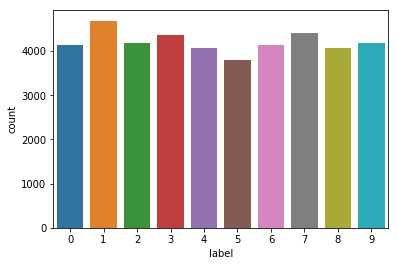

In [5]:
# 訓練データの各ラベル（「0~9」）のデータ数の確認
print('unique: ', MNIST_trainval.loc[:, 'label'].unique())
print(MNIST_trainval.loc[:, 'label'].value_counts())
sns.countplot(MNIST_trainval.loc[:, 'label'])

## 画像データで表示させてみる

In [6]:
# 使いづらいので訓練データのラベルの部分と画像データの部分を分割する
MNIST_trainval_label = MNIST_trainval.loc[:, 'label']
MNIST_trainval_data = MNIST_trainval.iloc[:, 1:]

# 画像データを28×28の2次元データに変換する
MNIST_trainval_img = MNIST_trainval_data.values.reshape(-1, 28, 28)

In [7]:
# 欠損値の確認
print(MNIST_trainval_data.isnull().sum().sum())
print(MNIST_trainval_label.isnull().sum().sum())

0
0


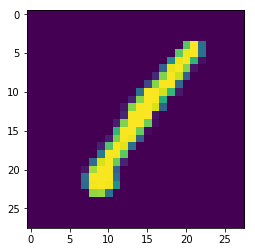

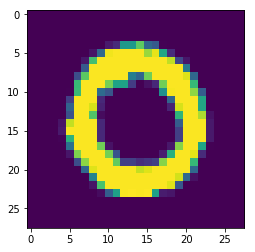

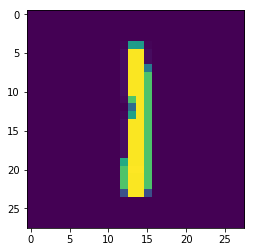

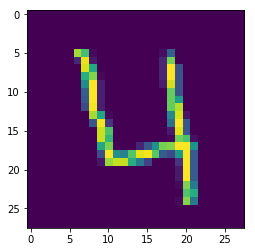

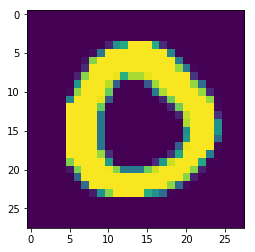

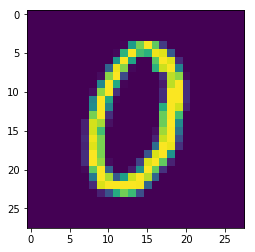

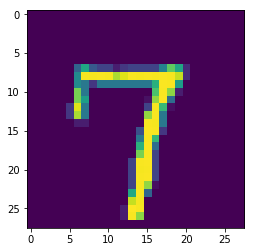

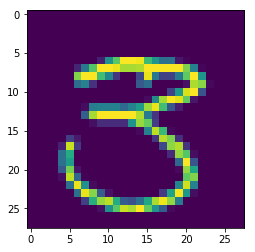

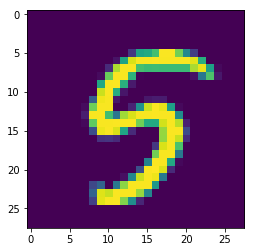

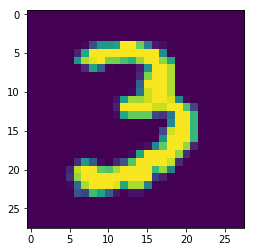

In [8]:
# とりあえず先頭から10枚の画像を表示させてみる
for img in MNIST_trainval_img[:10]:
    plt.imshow(img, vmin=0, vmax=255)
    plt.show()

# とりあえずネットワークを組んで学習させてみる

## Pytorchの準備

In [9]:
import torch
from torch import nn, optim

X size: torch.Size([42000, 784])
y size: torch.Size([42000])


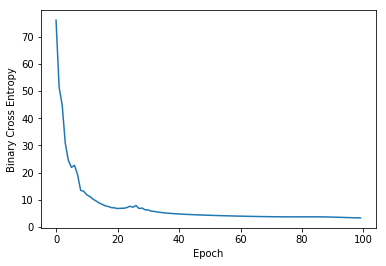

torch.Size([42000, 10])
tensor([1, 0, 1,  ..., 7, 6, 9])
Correct: 35184(0.838)


In [10]:
torch.manual_seed(0)

# tensor型に変更
X = torch.tensor(np.array(MNIST_trainval_data), dtype=torch.float32)
y = torch.tensor(np.array(MNIST_trainval_label), dtype=torch.int64)  # CrossEntropyLossは torch.int64を受け取る

# サイズ確認
print(f'X size: {X.size()}')
print(f'y size: {y.size()}')

# model
net = nn.Linear(in_features=784, out_features=10)
criterion = nn.CrossEntropyLoss()  # 勝手にSoftmaxになってしまう
optimizer = optim.SGD((net.parameters()), lr=0.0002)

# 学習
num_epochs = 100
loss_list = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()

    y_pred = net(X)

    loss = criterion(y_pred, y)

    # 勾配計算
    loss.backward()

    loss_list.append(loss.item())

    optimizer.step()

# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross Entropy')
plt.show()

# 予測確率の確認
output = net(X)
print(output.size())

# 予測ラベルの計算
# torch.max() は最大値と位置も表示する！！
_, labels_pred = torch.max(output, dim=1)
print(labels_pred)

# 正答数
correct_num = (y == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num / len(y)):.3f})')

## テストデータで実行してSubmission

In [11]:
# tensor型に変更
X_test = torch.tensor(np.array(MNIST_test), dtype=torch.float32)

# 予測を実行
y_test_pred = net(X_test)

# 予測結果を取得
_, y_test_pred_label = torch.max(y_test_pred, dim=1)

# 予測結果を表示
print(y_test_pred_label)

# 出力するためにデータフレームに集約(一度回答例を読み込んで変更する形で提出)
sub_df = pd.read_csv('C:/Users/0175216/Project/Practice05-O(MNIST-dataset)/MNIST/sample_submission.csv')
sub_df['Label'] = y_test_pred_label
sub_df.to_csv('C:/Users/0175216/Project/Practice05-O(MNIST-dataset)/MNIST/test_submission1.csv', index=False)

tensor([2, 0, 9,  ..., 3, 9, 2])


# 訓練検証データに対する予測失敗例の表示

## 予測失敗データの集約

In [12]:
# 予測失敗データのインデックスを取得
false_pred_index = np.array(labels_pred) != np.array(MNIST_trainval_label)

# 予測失敗データの数を確認
false_pred_index.sum()

6816

### 各数字に対する失敗例の数の表示

In [25]:
num_false_pred_index = []
for num in range(0, 9):
    num_false_pred_index.append(false_pred_index & (np.array(MNIST_trainval_label) == num))
    print(num, num_false_pred_index[num].sum())   

0 329
1 285
2 667
3 797
4 752
5 821
6 425
7 755
8 1286


### 各数字に対して、どの数字と予測して間違えているのか確認

In [14]:
# 正解に対する予測の数をカウントしていく
pred_label_heatmap = np.zeros([10,10], dtype=int)

for i in range(len(labels_pred)):
    pred_label_heatmap[np.array(MNIST_trainval_label)[i]][np.array(labels_pred)[i]] += 1

Text(69.0, 0.5, 'answer num')

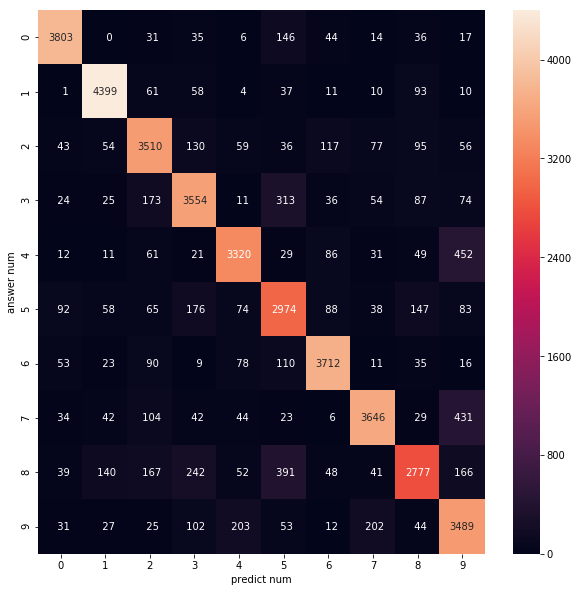

In [24]:
# ヒートマップを表示
plt.figure(figsize=[10, 10])
sns.heatmap(pd.DataFrame(pred_label_heatmap), annot=True, fmt='4g')

plt.xlabel('predict num')
plt.ylabel('answer num')

以上のモデルから、このモデルは

正解 → 予測  
3 → 2,5  
4 → 9  
5 → 3,8  
7 → 9  
8 → 1,2,3,5,9  
9 → 4,7  

で予測失敗することが多いことがわかる。中でも8は予測失敗の割合が多い

おわり（時間があったら間違えている予測結果とその画像を並べて表示させてみたい）